In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import os
os.chdir('../')

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

from tfn.preprocess import Dataset
from tfn.feature_extraction.tf_idf import get_tfidf_model

In [8]:
### PLOT SETUP ###

COLOR_0 = '#00203F'
COLOR_1 = '#ADEFD1'

COLOR_NEG = '#87EBA8'
COLOR_NEU = '#EEEEEE'
COLOR_POS = '#F28268'
COLOR_OTH = '#7389AE'

TITLE_SIZE = 24
SUBTITLE_SIZE = 20
TICK_SIZE = 16

plt.style.use('seaborn-paper')

rcParams['font.size'] = TICK_SIZE

labels=['Non-Disaster', 'Disaster']

In [3]:
data = Dataset('twitter')

X = np.concatenate((data.X_train, data.X_test))
Y = np.concatenate((data.y_train, data.y_test))

In [4]:
_, corpus_matrix, _ = get_tfidf_model(X)

# This takes a while
U, S, V = np.linalg.svd(corpus_matrix.toarray())

In [19]:
principle_dirs = V.T[:2]
data_principle = corpus_matrix.toarray() @ principle_dirs.T

In [52]:
def plot_scatter(X):
    data_df = pd.DataFrame(X)
    data_df['label'] = Y
    
    fig = plt.figure(figsize=(7,7))
    #ax = fig.add_subplot(111, projection='3d')
    ax = fig.subplots()
    for target, label, color in zip([0, 1], labels, [COLOR_0, COLOR_1]):
        d = data_df[data_df['label'] == target]
        ax.scatter(d[0], d[1], label=label, color=color)
        ax.legend(labels, fontsize=12)
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        
    ax.set_xlabel('PC 1', fontsize=12)
    ax.set_ylabel('PC 2', fontsize=12)
    plt.show()
    plt.savefig('figures/pca')
    '''
    for angle in range(0, 360):
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(0.001)'''

<IPython.core.display.Javascript object>


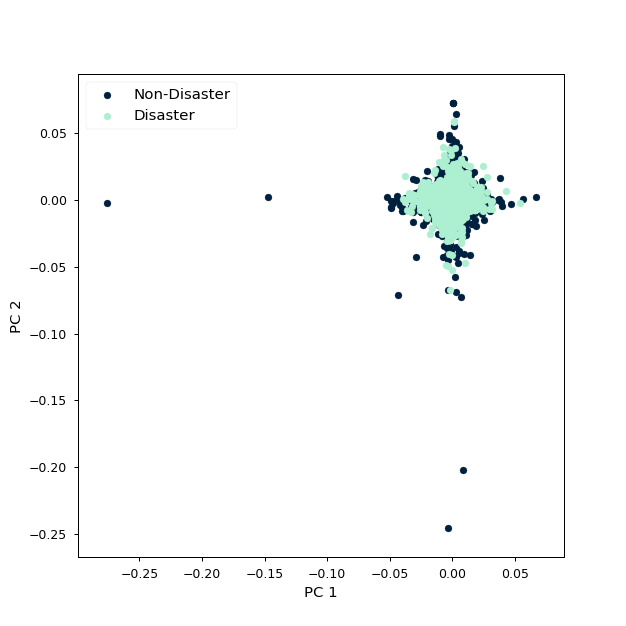

In [53]:
plot_scatter(data_principle)